<a href="https://colab.research.google.com/github/anikxz/Heart-Disease-Prediction-Using-Various-Data-Science-Algorithm/blob/main/An_Approach_to_heart_disease_prediction_using_Data_Science_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/Final data HD.csv')

In [ ]:
data.head(9)

,age,sex,cp_type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1


In [ ]:
data.shape

(1190, 12)

In [ ]:
data['target'].value_counts()

1    629
0    561
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


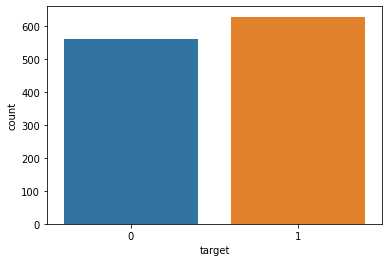

In [ ]:
sns.countplot(data['target'])

In [ ]:
data.isnull().values.any()

False

In [ ]:
data.describe()

,age,sex,cp_type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


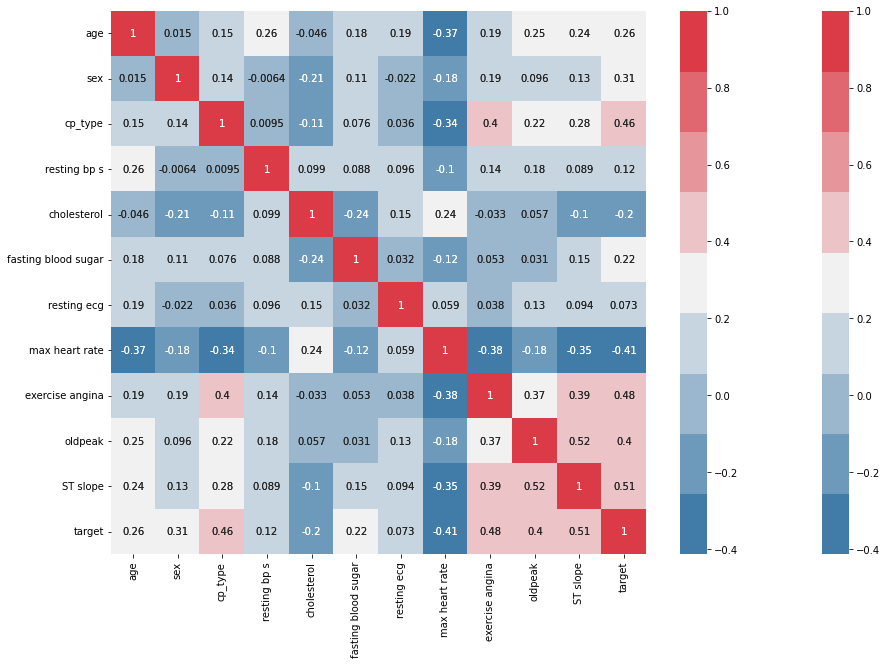

In [ ]:
#correlation matrix
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
annot=True, cmap=sns.diverging_palette(240, 10, n=9))
sns.heatmap(corr, xticklabels=corr.columns,
yticklabels=corr.columns,
annot=True,
cmap=sns.diverging_palette(240, 10, n=9))

In [ ]:
x = data.iloc[:,:-1]

In [ ]:
x

,age,sex,cp_type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2
1186,68,1,4,144,193,1,0,141,0,3.4,2
1187,57,1,4,130,131,0,0,115,1,1.2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2


In [ ]:
y = data.iloc[:,11]

In [ ]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20 , random_state=10)

In [ ]:
xtrain

,age,sex,cp_type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
1129,49,0,4,130,269,0,0,163,0,0.0,1
30,53,1,3,145,518,0,0,130,0,0.0,2
452,64,1,4,144,0,0,1,122,1,1.0,2
658,62,0,4,124,209,0,0,163,0,0.0,1
903,48,1,2,110,229,0,0,168,0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...
733,46,1,4,120,249,0,2,144,0,0.8,1
1180,63,1,4,140,187,0,2,144,1,4.0,1
1147,44,0,3,118,242,0,0,149,0,0.3,2
527,65,1,4,144,312,0,2,113,1,1.7,2


ANN


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(xtrain)
x_train = scaler.transform(xtrain)
x_test = scaler.transform(xtest)

In [ ]:
x_train

array([[-0.49745738, -1.77175914,  0.82157595, ..., -0.8008616 ,
        -0.84655301, -1.00477486],
       [-0.06819889,  0.5644108 , -0.24111468, ..., -0.8008616 ,
        -0.84655301,  0.62755563],
       [ 1.11226195,  0.5644108 ,  0.82157595, ...,  1.24865519,
         0.0699925 ,  0.62755563],
       ...,
       [-1.03403049, -1.77175914, -0.24111468, ..., -0.8008616 ,
        -0.57158936,  0.62755563],
       [ 1.21957657,  0.5644108 ,  0.82157595, ...,  1.24865519,
         0.71157436,  0.62755563],
       [ 0.68300346, -1.77175914, -2.36649594, ..., -0.8008616 ,
        -0.02166205, -1.00477486]])

In [ ]:
x_test

array([[-0.06819889,  0.5644108 ,  0.82157595, ...,  1.24865519,
         1.99473807,  2.25988613],
       [ 1.11226195,  0.5644108 ,  0.82157595, ...,  1.24865519,
         1.16984711,  2.25988613],
       [-1.35597436, -1.77175914, -1.30380531, ..., -0.8008616 ,
        -0.84655301, -1.00477486],
       ...,
       [ 0.46837422,  0.5644108 , -0.24111468, ..., -0.8008616 ,
         2.08639262, -1.00477486],
       [ 0.36105959,  0.5644108 ,  0.82157595, ...,  1.24865519,
         0.98653801,  0.62755563],
       [ 0.25374497,  0.5644108 , -0.24111468, ...,  1.24865519,
        -0.29662571,  0.62755563]])

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam ,SGD
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(ytrain, 2)
y_test = to_categorical(ytest, 2)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(128,input_dim=11,kernel_initializer='normal',activation='relu'))#input layer
model.add(Dropout(0.5))
model.add(Dense(17,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))#output layer
model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 17)                2193      
                                                                 
 dropout_1 (Dropout)         (None, 17)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                288       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 15)                2

In [ ]:
model.fit(x_train,y_train,validation_split=0.2,epochs=25)

Epoch 1/25
24/24 [==============================] - 2s 24ms/step - loss: 0.6927 - accuracy: 0.5375 - val_loss: 0.6918 - val_accuracy: 0.5236
Epoch 2/25
24/24 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5703 - val_loss: 0.6863 - val_accuracy: 0.5602
Epoch 3/25
24/24 [==============================] - 0s 8ms/step - loss: 0.6763 - accuracy: 0.6873 - val_loss: 0.6498 - val_accuracy: 0.8010
Epoch 4/25
24/24 [==============================] - 0s 6ms/step - loss: 0.6078 - accuracy: 0.7622 - val_loss: 0.5236 - val_accuracy: 0.8063
Epoch 5/25
24/24 [==============================] - 0s 5ms/step - loss: 0.5232 - accuracy: 0.8068 - val_loss: 0.4526 - val_accuracy: 0.8010
Epoch 6/25
24/24 [==============================] - 0s 5ms/step - loss: 0.4736 - accuracy: 0.8213 - val_loss: 0.4368 - val_accuracy: 0.7958
Epoch 7/25
24/24 [==============================] - 0s 6ms/step - loss: 0.4560 - accuracy: 0.8331 - val_loss: 0.4336 - val_accuracy: 0.8115
Epoch 8/25
24/24 [=

In [ ]:
y_pred = model.predict(x_test)
ytest_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       104
           1       0.91      0.87      0.89       134

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



**KNN**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(xtrain, ytrain) #train model
y_pred1 = model1.predict(xtest)
print(classification_report(ytest, y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       104
           1       0.85      0.81      0.83       134

    accuracy                           0.81       238
   macro avg       0.81      0.81      0.81       238
weighted avg       0.81      0.81      0.81       238



In [ ]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(model1, xtrain,ytrain, scoring='accuracy')
# get importance
importance1 = results.importances_mean
df1=pd.Series(importance1)
df1.index=x.columns
df1.sort_values(ascending=False)

cholesterol            0.396639
max heart rate         0.362815
resting bp s           0.260084
age                    0.190756
cp_type                0.000420
sex                    0.000000
fasting blood sugar    0.000000
resting ecg            0.000000
exercise angina        0.000000
oldpeak                0.000000
ST slope               0.000000
dtype: float64

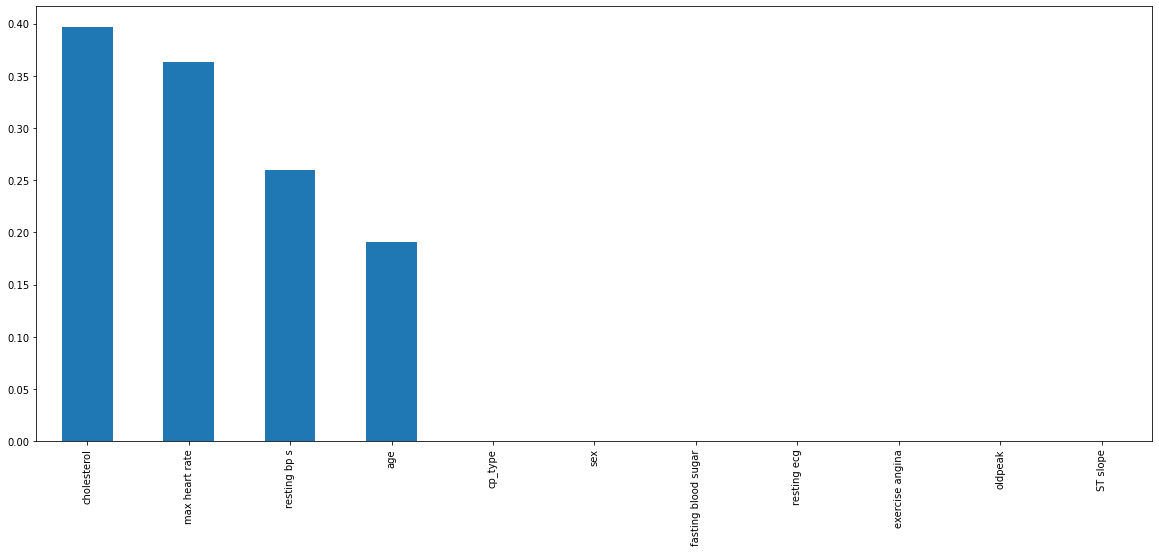

In [ ]:
df1.sort_values(ascending=False).plot.bar(figsize=(20,8))

**LogisticRegression**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(random_state=4)
model2.fit(xtrain, ytrain) #train model
y_pred2 = model2.predict(xtest)
print(classification_report(ytest, y_pred2)) #accuracy

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       104
           1       0.89      0.81      0.85       134

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.85      0.84      0.84       238



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:

df2=pd.Series(model2.coef_[0])
df2.index=x.columns
df2.sort_values(ascending=False)

sex                    1.185529
exercise angina        0.983559
ST slope               0.883041
fasting blood sugar    0.656109
cp_type                0.610677
oldpeak                0.402900
resting ecg            0.141143
cholesterol           -0.002273
resting bp s          -0.005590
age                   -0.006349
max heart rate        -0.023699
dtype: float64

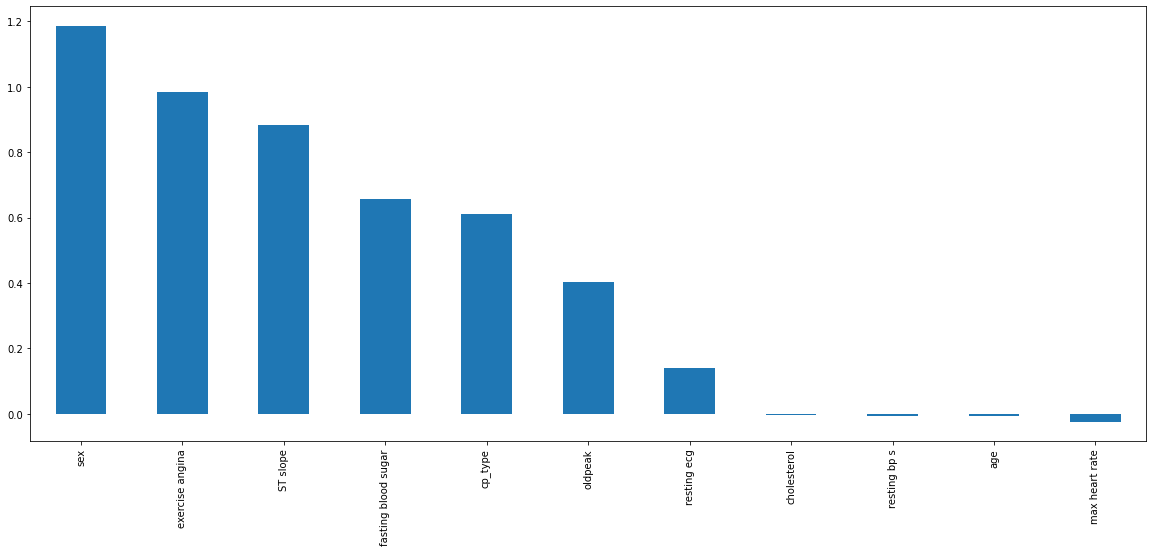

In [ ]:
df2.sort_values(ascending=False).plot.bar(figsize=(20,8))

**RandomForestClassifier**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=4)
model3.fit(xtrain, ytrain) #train model
y_pred3 = model3.predict(xtest)
print(classification_report(ytest, y_pred3)) #accuracy

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       104
           1       0.95      0.92      0.94       134

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



In [ ]:
df3=pd.Series(model3.feature_importances_)
df3.index=x.columns
df3.sort_values(ascending=False)

ST slope               0.186778
cp_type                0.146137
max heart rate         0.137513
oldpeak                0.102019
cholesterol            0.097875
age                    0.086943
resting bp s           0.084063
exercise angina        0.065693
sex                    0.046006
resting ecg            0.028024
fasting blood sugar    0.018950
dtype: float64

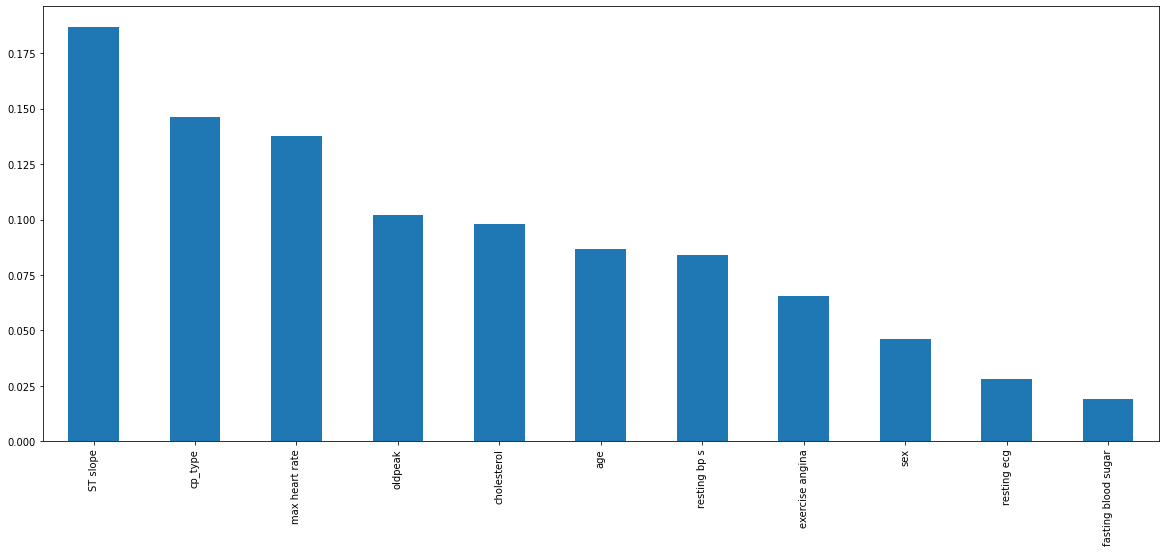

In [ ]:
df3.sort_values(ascending=False).plot.bar(figsize=(20,8))

**SVM**

In [ ]:
from sklearn.metrics import classification_report
from sklearn import svm
model4 = svm.SVC(kernel = 'linear',gamma='auto',C=2)
model4.fit(xtrain, ytrain) #train model
y_pred4 = model4.predict(xtest)
print(classification_report(ytest, y_pred4)) #accuracy

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.90      0.86      0.88       134

    accuracy                           0.87       238
   macro avg       0.86      0.87      0.86       238
weighted avg       0.87      0.87      0.87       238



In [ ]:
from sklearn.inspection import permutation_importance
# perform permutation importance
results = permutation_importance(model4, xtrain,ytrain, scoring='accuracy')
# get importance
importance4 = results.importances_mean
df4=pd.Series(importance4)
df4.index=x.columns
df4.sort_values(ascending=False)

ST slope               0.052101
cp_type                0.025840
exercise angina        0.016597
sex                    0.013445
oldpeak                0.011345
cholesterol            0.008403
fasting blood sugar    0.004412
max heart rate         0.001471
age                    0.001261
resting bp s           0.001050
resting ecg           -0.001050
dtype: float64

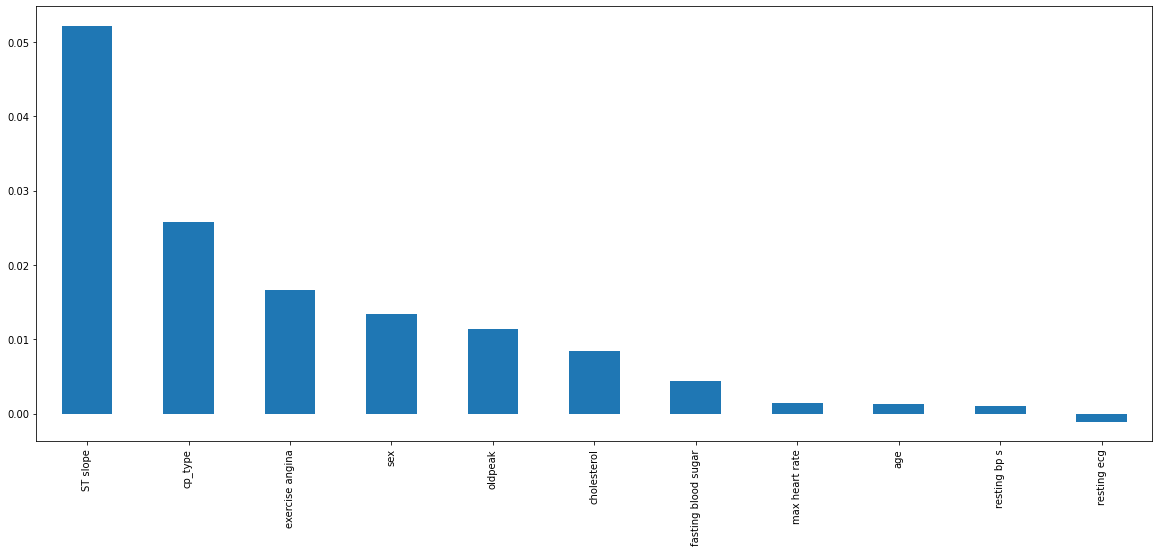

In [ ]:
df4.sort_values(ascending=False).plot.bar(figsize=(20,8))

**AdaBoostClassifier**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
model5=AdaBoostClassifier(random_state=4)
model5.fit(xtrain, ytrain) #train model
y_pred5 = model5.predict(xtest)
print(classification_report(ytest, y_pred5)) #accuracy


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.91      0.87      0.89       134

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



In [ ]:
df5=pd.Series(model5.feature_importances_)
df5.index=x.columns
df5.sort_values(ascending=False)

cholesterol            0.34
age                    0.18
resting bp s           0.16
max heart rate         0.08
oldpeak                0.08
ST slope               0.06
sex                    0.02
cp_type                0.02
fasting blood sugar    0.02
resting ecg            0.02
exercise angina        0.02
dtype: float64

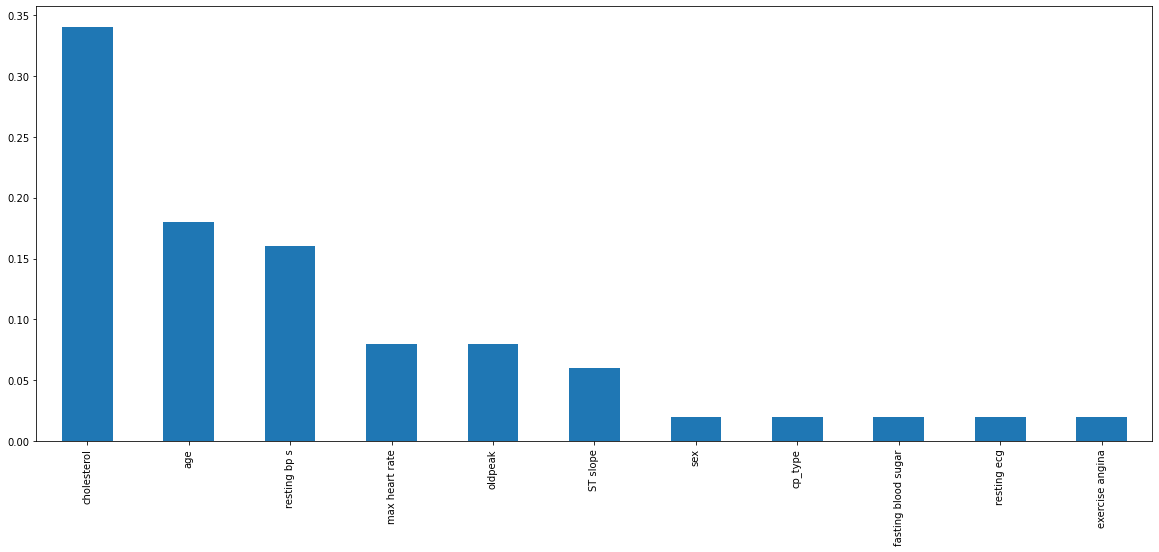

In [ ]:
df5.sort_values(ascending=False).plot.bar(figsize=(20,8))

gradient boosting **machine**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier(n_estimators=5000,max_features='sqrt')
model6.fit(xtrain,ytrain)
y_pred6 = model6.predict(xtest)
print(classification_report(ytest, y_pred6)) #accuracy

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       104
           1       0.95      0.92      0.94       134

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



In [ ]:
df6=pd.Series(model6.feature_importances_)
df6.index=x.columns
df6.sort_values(ascending=False)

ST slope               0.182313
cp_type                0.159931
exercise angina        0.122081
max heart rate         0.107444
oldpeak                0.107198
cholesterol            0.103323
resting bp s           0.065324
age                    0.065025
sex                    0.053033
fasting blood sugar    0.019877
resting ecg            0.014451
dtype: float64

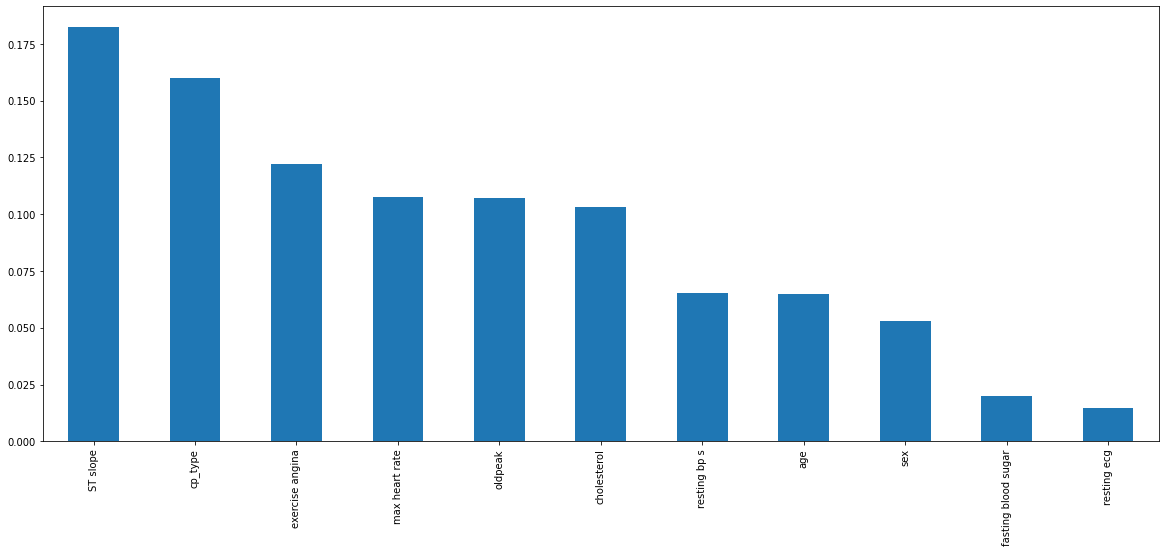

In [ ]:
df6.sort_values(ascending=False).plot.bar(figsize=(20,8))

XGBoost (n_estimators=500)

In [ ]:
from sklearn.metrics import classification_report
import xgboost as xgb
model7 = xgb.XGBClassifier(n_estimators= 500)
model7.fit(xtrain,ytrain)
y_pred7 = model7.predict(xtest)
print(classification_report(ytest, y_pred7)) #accuracy


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       104
           1       0.98      0.91      0.94       134

    accuracy                           0.94       238
   macro avg       0.93      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238



In [ ]:
df7=pd.Series(model7.feature_importances_)
df7.index=x.columns
df7.sort_values(ascending=False)

ST slope               0.297199
cp_type                0.164621
exercise angina        0.130094
sex                    0.097875
fasting blood sugar    0.070452
oldpeak                0.052519
resting ecg            0.041555
resting bp s           0.040521
cholesterol            0.038712
max heart rate         0.036772
age                    0.029678
dtype: float32

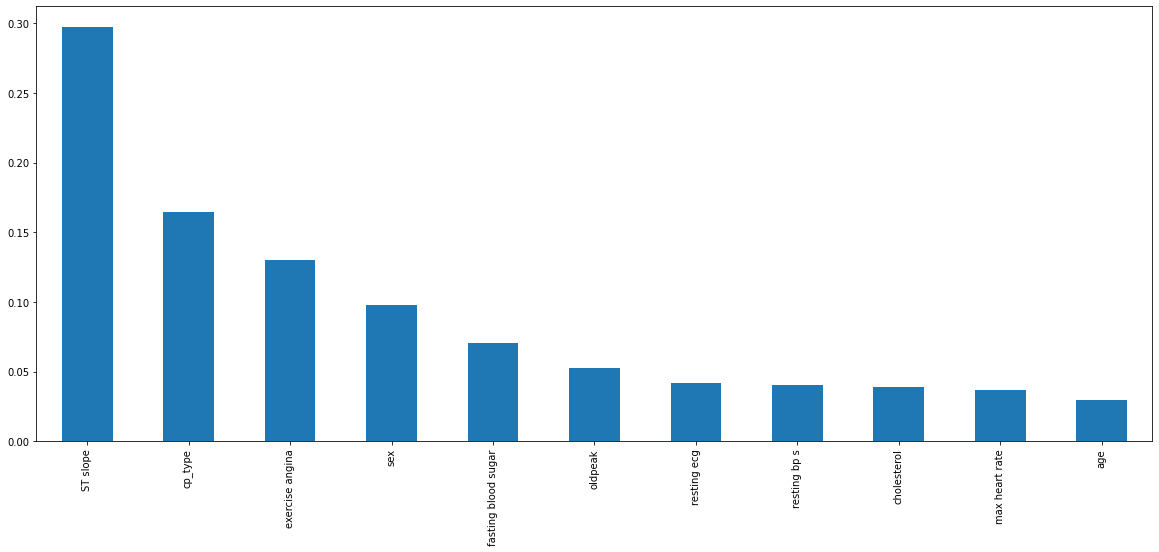

In [ ]:
df7.sort_values(ascending=False).plot.bar(figsize=(20,8))